In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df_kpi = pd.read_csv('default SAC 500 norm space results\KPIs.csv',
                     index_col=0,)

In [47]:
df_kpi['PPO_untargeted_myPGD_05'] = pd.read_csv('20 bin PPO 500 results\KPIs.csv',
                                                usecols=['untargeted_myPGD_05']).values
df_kpi['PPO_baseline'] = pd.read_csv('20 bin PPO 500 results\KPIs.csv',
                                                usecols=['baseline']).values
df_kpi['PPO_bifurcated_myPGD_05'] = pd.read_csv('20 bin PPO 500 results\KPIs.csv',
                                                usecols=['untargeted_binary_myPGD_05']).values


In [48]:
df_kpi

,baseline,uACG_binary_SAC_05_eps,uACG_binary_SAC_03_eps,uACG_binary_SAC_01_eps,uACG_binary_SAC_03_eps_linear_half_m,uACG_binary_SAC_03_eps_2_-1_-2_1,untargeted_myPGD,untargeted_binary_myPGD_5%,untargeted_myPGD_5%_huber,untargeted_myPGD_5%_mae,...,toggle_binary_myPGD_03_mask_time,untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps,untargeted_binary_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs,bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption,untargeted_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs,toggle_binary_myPGD_03_mask_time_and_solar_scale_consumption_eps_clipped,untargeted_binary_myPGD_03_mask_time_REscale_solar_and_consumption_eps_clipped_adv_obs,PPO_untargeted_myPGD_05,PPO_baseline,PPO_bifurcated_myPGD_05
cost_function,,,,,,,,,,,,,,,,,,,,,
annual_peak_average,1.000000,1.342464,0.948487,1.000000,1.000000,1.168632,1.204332,1.523815,1.204332,1.204332,...,1.649908,1.478223,1.044229,1.148366,1.000000,1.015885,1.046289,1.009338,1.102271,1.189929
carbon_emissions_total,0.865047,1.242219,1.095207,0.880242,0.950469,0.966900,1.021518,1.353868,1.021518,1.021518,...,1.287892,1.086974,0.958892,1.040241,0.930463,0.933124,0.958512,0.887172,0.869186,0.961659
cost_total,0.798446,1.268846,1.029060,0.812207,0.870724,0.868638,0.999555,1.433562,0.999555,0.999555,...,1.226057,1.055431,0.922338,0.982513,0.883112,0.872467,0.921895,0.807983,0.787803,0.914933
daily_one_minus_load_factor_average,1.029992,0.964124,0.957175,1.018309,1.085792,0.999809,1.002122,0.966036,1.002122,1.002122,...,0.968136,0.973312,0.987948,0.963204,1.117247,0.996977,0.989155,1.107920,1.095762,0.983696
daily_peak_average,0.898622,1.490465,1.224974,0.907752,0.987713,1.139255,1.110500,1.926619,1.110500,1.110500,...,1.808064,1.473465,1.027290,1.141257,0.982575,0.986720,1.030163,0.925837,0.894595,1.140678
electricity_consumption_total,0.880915,1.239223,1.110260,0.895594,0.965677,0.987572,1.017230,1.325486,1.017230,1.017230,...,1.314430,1.102356,0.966015,1.051774,0.939536,0.946797,0.965838,0.893111,0.879108,0.961546
monthly_one_minus_load_factor_average,0.985816,1.009967,0.987099,0.982567,0.983397,0.991726,1.018583,1.014810,1.018583,1.018583,...,1.013673,1.019719,0.997175,0.997726,1.001587,0.995948,0.996660,0.976898,0.988364,1.014428
ramping_average,1.088549,1.995345,2.030506,1.186626,1.519874,1.517908,1.120612,2.057386,1.120612,1.120612,...,4.526857,1.946326,1.360478,1.852770,1.131096,1.686584,1.361771,1.161926,1.093749,1.524575
zero_net_energy,1.083645,1.104934,1.128404,1.089121,1.096216,1.098690,1.012245,1.100700,1.012245,1.012245,...,1.210847,1.115889,1.084420,1.113353,1.057213,1.097709,1.084689,1.105981,1.107710,1.117022


In [49]:
df_mae = pd.read_csv('default SAC 500 norm space results\MAEs.csv',
                     index_col=0)

In [50]:
df_kpi.columns

Index(['baseline', 'uACG_binary_SAC_05_eps', 'uACG_binary_SAC_03_eps',
       'uACG_binary_SAC_01_eps', 'uACG_binary_SAC_03_eps_linear_half_m',
       'uACG_binary_SAC_03_eps_2_-1_-2_1', 'untargeted_myPGD',
       'untargeted_binary_myPGD_5%', 'untargeted_myPGD_5%_huber',
       'untargeted_myPGD_5%_mae', 'ATLA_ADV_2-19-10',
       'untargeted_myPGD_05_mse', 'toggle_binary_myPGD_5%',
       'untargeted_binary_myPGD_5%_mask_time',
       'untargeted_binary_myPGD_03_mask_time',
       'toggle_binary_myPGD_03_mask_time',
       'untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps',
       'untargeted_binary_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs',
       'bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption',
       'untargeted_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs',
       'toggle_binary_myPGD_03_mask_time_and_solar_scale_consumption_eps_clipped',
       'untargeted_binary_myPGD_03_mask_time_REscale_solar_and_

In [51]:
df_kpi.columns[df_kpi.columns.str.contains(('untargeted_myPGD'))]

Index(['untargeted_myPGD', 'untargeted_myPGD_5%_huber',
       'untargeted_myPGD_5%_mae', 'untargeted_myPGD_05_mse',
       'untargeted_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs',
       'PPO_untargeted_myPGD_05'],
      dtype='object')

Below we see that the performance of myPGD is insensitive to the choice of loss function between MSE, MAE, and Huber. The difference between CE and DLR is caused by vanishing gradients, which is not an issue for any of these function as they are never 0 in this maximization problem. MSE seems to run fastest, and 15 vs 25 minute for bifurcation

In [52]:
df_kpi[df_kpi.columns[df_kpi.columns.str.contains(('untargeted_myPGD'))]]

,untargeted_myPGD,untargeted_myPGD_5%_huber,untargeted_myPGD_5%_mae,untargeted_myPGD_05_mse,untargeted_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs,PPO_untargeted_myPGD_05
cost_function,,,,,,
annual_peak_average,1.204332,1.204332,1.204332,1.204332,1.000000,1.009338
carbon_emissions_total,1.021518,1.021518,1.021518,1.021518,0.930463,0.887172
cost_total,0.999555,0.999555,0.999555,0.999555,0.883112,0.807983
daily_one_minus_load_factor_average,1.002122,1.002122,1.002122,1.002122,1.117247,1.107920
daily_peak_average,1.110500,1.110500,1.110500,1.110500,0.982575,0.925837
electricity_consumption_total,1.017230,1.017230,1.017230,1.017230,0.939536,0.893111
monthly_one_minus_load_factor_average,1.018583,1.018583,1.018583,1.018583,1.001587,0.976898
ramping_average,1.120612,1.120612,1.120612,1.120612,1.131096,1.161926
zero_net_energy,1.012245,1.012245,1.012245,1.012245,1.057213,1.105981


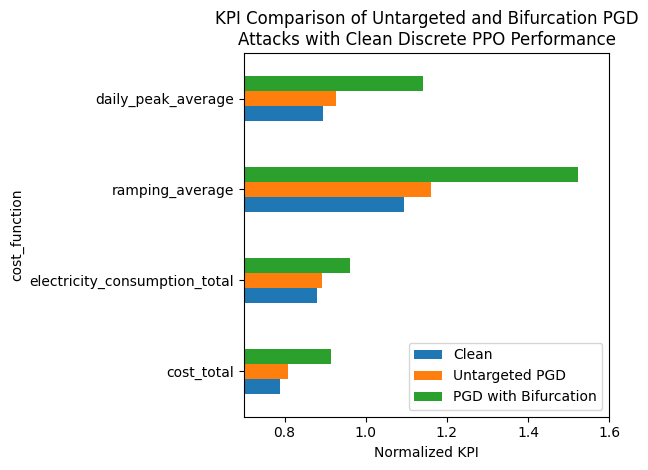

In [53]:
kpi_to_plot = ['cost_total', 'electricity_consumption_total','ramping_average','daily_peak_average']
ax = df_kpi[['PPO_baseline','PPO_untargeted_myPGD_05','PPO_bifurcated_myPGD_05']].loc[kpi_to_plot].plot.barh(xlim=0.7,
                                                                               ylabel='KPI',
                                                                               title='KPI Comparison of Untargeted and Bifurcation PGD\nAttacks with Clean Discrete PPO Performance',
                                                                               )
ax.legend(['Clean', 'Untargeted PGD', 'PGD with Bifurcation'])
ax.set_xlabel('Normalized KPI')
plt.tight_layout()

##### TODO

Label bars

Text(0.5, 0, 'Normalized KPI')

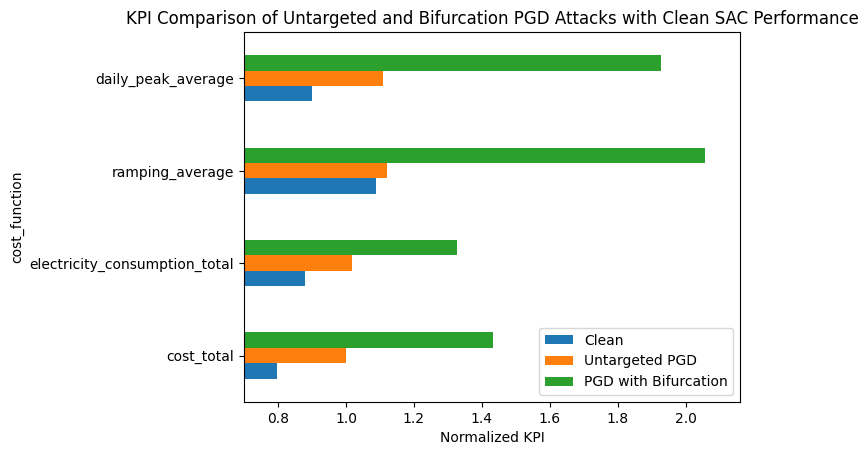

In [54]:
kpi_to_plot = ['cost_total', 'electricity_consumption_total','ramping_average','daily_peak_average']
ax = df_kpi[['baseline','untargeted_myPGD','untargeted_binary_myPGD_5%']].loc[kpi_to_plot].plot.barh(xlim=0.7,
                                                                               ylabel='KPI',
                                                                               title='KPI Comparison of Untargeted and Bifurcation PGD Attacks with Clean SAC Performance',
                                                                               )
ax.legend(['Clean', 'Untargeted PGD', 'PGD with Bifurcation'])
ax.set_xlabel('Normalized KPI')

Note that the bifurcation attack is much more effective then an direct untargeted attack

TODO: Compare with myPGD on discrete agent, which is most robust? Compare direct attack, since the bifurcation attack using both a different loss function and output layer, so there are more variables (the bifurcation attack also has a low ASR with ACG, it could be much lower with myPGD). This is the closest comparison

Plot actions between bifurcation these attacks

In [55]:
df_mae

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,uACG_binary_SAC_03_eps_linear_half_m,uACG_binary_SAC_03_eps_2_-1_-2_1,untargeted_myPGD,untargeted_binary_myPGD_5%,untargeted_myPGD_5%_huber,untargeted_myPGD_5%_mae,untargeted_myPGD_05_mse,untargeted_toggle_binary_myPGD_5%,untargeted_binary_myPGD_5%_mask_time,untargeted_binary_myPGD_03_mask_time,toggle_binary_myPGD_03_mask_time,untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps,untargeted_binary_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs,bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption,untargeted_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs,toggle_binary_myPGD_03_mask_time_and_solar_scale_consumption_eps_clipped,untargeted_binary_myPGD_03_mask_time_REscale_solar_and_consumption_eps_clipped_adv_obs
0,0,0,0,0.167685,0.098811,0.268961,0.478598,0.268961,0.268961,0.268961,0.354852,0.431224,0.27257,0.217104,0.189988,0.109275,0.121881,0.101177,0.102491,0.109455


All myPGD attacks have similar MAEs, so this does not explain the variation in KPIs

Text(0.5, 0, 'Normalized KPI')

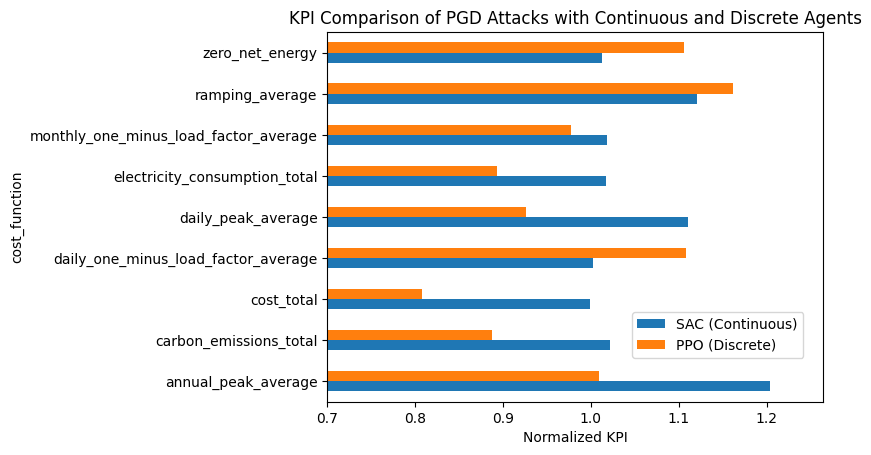

In [56]:
ax = df_kpi[['untargeted_myPGD','PPO_untargeted_myPGD_05']].plot.barh(xlim=0.7,
                                                                    ylabel='KPI',
                                                                    title='KPI Comparison of PGD Attacks with Continuous and Discrete Agents'
                                                                    )
ax.legend(['SAC (Continuous)', 'PPO (Discrete)'],
          bbox_to_anchor=(0.6, 0.1),)
ax.set_xlabel('Normalized KPI')

Particularly with the ramping KPI, the Discrete agent seem more robust than the continuous agent, though they are different algorithms with the former a PPO and latter a SAC (does one algorithm produce a more robust policy during training, or is the action space the principal differnce?). Both are subject to the myPGD attck, but with one being a classifier policy and the other a regression policy, different loss functions were required (DL and MSE loss, neith has vanishing gradients like CE). 

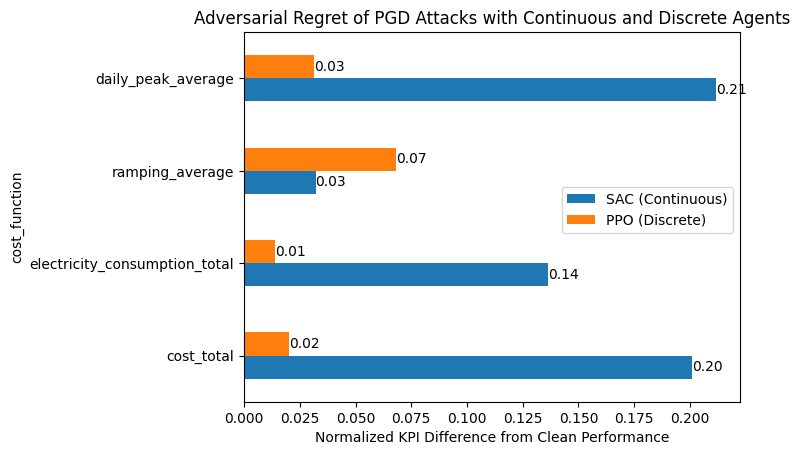

In [57]:
cols_to_plot = ['untargeted_myPGD','PPO_untargeted_myPGD_05']
df_diff = df_kpi[['baseline','PPO_baseline']]
df_diff.columns = cols_to_plot
df_diff = df_kpi[cols_to_plot] - df_diff

kpi_to_plot = ['cost_total', 'electricity_consumption_total','ramping_average','daily_peak_average']
ax = df_diff.loc[kpi_to_plot].plot.barh(
                  ylabel='KPI',
                  title='Adversarial Regret of PGD Attacks with Continuous and Discrete Agents',
                  )
ax.legend(['SAC (Continuous)', 'PPO (Discrete)'],
          bbox_to_anchor=(1.0, 0.6),
          )
ax.set_xlabel('Normalized KPI Difference from Clean Performance')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')

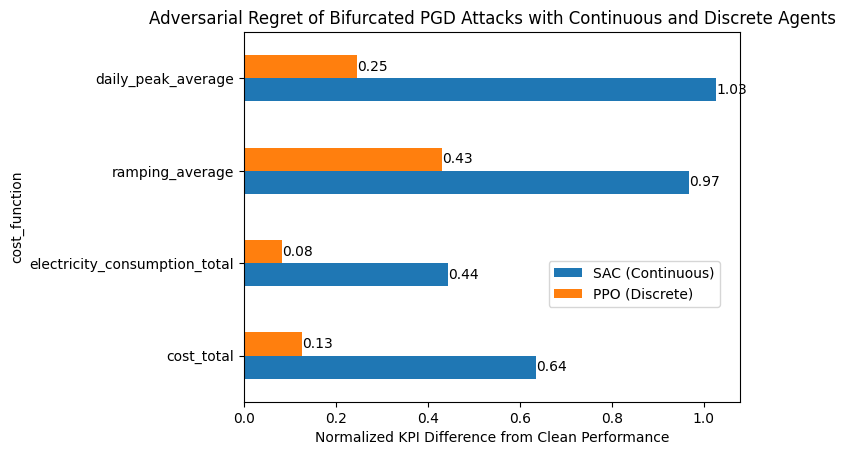

In [58]:
cols_to_plot = ['untargeted_binary_myPGD_5%','PPO_bifurcated_myPGD_05']
df_diff = df_kpi[['baseline','PPO_baseline']]
df_diff.columns = cols_to_plot
df_diff = df_kpi[cols_to_plot] - df_diff

ax = df_diff.loc[kpi_to_plot].plot.barh(
                  ylabel='KPI',
                  title='Adversarial Regret of Bifurcated PGD Attacks with Continuous and Discrete Agents',
                  )
ax.legend(['SAC (Continuous)', 'PPO (Discrete)'],
          bbox_to_anchor=(0.6, 0.4),
          )
ax.set_xlabel('Normalized KPI Difference from Clean Performance')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')